<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP07_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task** - ICP07 Big Data

# **Topic covered**  - KMeans 

---


**Created by** - Prabhanjan Tirvedi


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data set** - Data set is picked up from kaggle website. This is basic dataset to learn and implement Kmeans algorithm for clustering. This is unsupervised learning. 

Link for dataset - https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data?select=Mall_Customers.csv

In [2]:
#Data is downloaded in local and exporting to google colab environment.
#uploading the file from local drive 
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [3]:
#Reading the data and looking at the first five rows of the data.
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The aim of this problem is to segment the customers based on their gender, age, annual income (in thousand dollars) and  spending score. So, let’s start coding!

Now, we have to segment the customers based on the provided details. Before doing that, let’s pull out some statistics and information related to the data:

In [4]:
#Basic information of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We have 5 columns and 200 rows. None of the columns have null values.
First column CustomerID is just index and has no significance in clustering the data. So we can drop the first column.

In [5]:
#Dropping the first column
# .drop iss method where axis = 1 for column and inplace means , it will amke change in same dataframe.
data.drop('CustomerID', axis  = 1, inplace=True)
data.shape

(200, 4)

Now we are good as we have all 4 significant columns to process. 

In [6]:
# statistics of the data
data.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Here, we can see  that we get statistical information of only numerical columns. Column *Genre* being categorical value, there is no statistical data for it. For Kmeans, only continuous data matters. The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful.
So we are not considering column 'Genre' for Kmeans here.

There is a variation in the magnitude of the data. 
Variables like Age has low magnitude whereas variables like Annual_Income_(k$) and Spendng_Score have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [7]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# using only Spending_Score and income variable for easy visualisation
data_scaled = scaler.fit_transform(data[data.columns[2:]])
print('Type of data_scaled: {}'.format(type(data_scaled)))

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

Type of data_scaled: <class 'numpy.ndarray'>


,0,1
count,2.000000e+02,2.000000e+02
mean,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


The magnitude looks similar now.

In [8]:
#changing scaled data set type to pandas dataframe
df_scaled = pd.DataFrame(data_scaled, columns = data.columns[2:])

In [9]:
#view of first 5 data after scaling
df_scaled.head()

,Annual_Income_(k$),Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [10]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

In lecture, It was learnt that this algorithm randomly initialize the centroids in k-means clustering. Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [11]:
# inertia on the fitted data
kmeans.inertia_

269.6910121927639

how can we decide the optimum number of clusters? One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.

We got an inertia value of almost 269. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

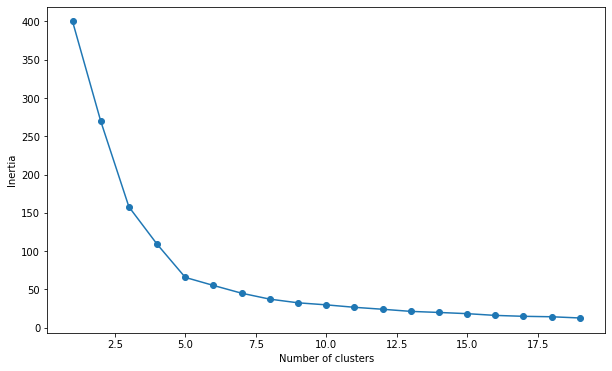

In [12]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 3 to 7. Let’s define a function which create a kmeans model and return predicted value and centroid of the clusters. We can pass the cluster value and dataframe to the function.

In [13]:
# define a function to calculate k means using k-means++ initialization
#input - Dataframe and number of clusters
#output - predited value
def kmeans_func(no_cluster, df):
  kmeans = KMeans(n_jobs = -1, n_clusters = no_cluster, init='k-means++')
  kmeans.fit(df)
  pred = kmeans.predict(df)
  kmeans.cluster_centers_
  return (pred, kmeans.cluster_centers_)

We call the above function and pass cluster size from 3 till 7 and see the prediction value.


In [14]:
#Getting prediction and centriod for each cluster size
#pred_3 is predicted value for cluster size of 3 and having centriod data for these clusters on variable centroid_3.
pred_3, centroid_3 = kmeans_func(3,df_scaled)
pred_4, centroid_4 = kmeans_func(4,df_scaled)
pred_5, centroid_5 = kmeans_func(5,df_scaled)
pred_6, centroid_6 = kmeans_func(6,df_scaled)
pred_7, centroid_7 = kmeans_func(7,df_scaled)

let’s look at the value count of points in above-formed first clusters (cluster of size 3).

In [15]:
# data count for number of cluster 3
unique, counts = np.unique(pred_3, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  38]
 [  1 123]
 [  2  39]]


Here we can plot for each cluster size for easy understanding.


In [16]:
#changing scaled data to numpy array for ease in plotting 
df_scaled = np.array(df_scaled) 

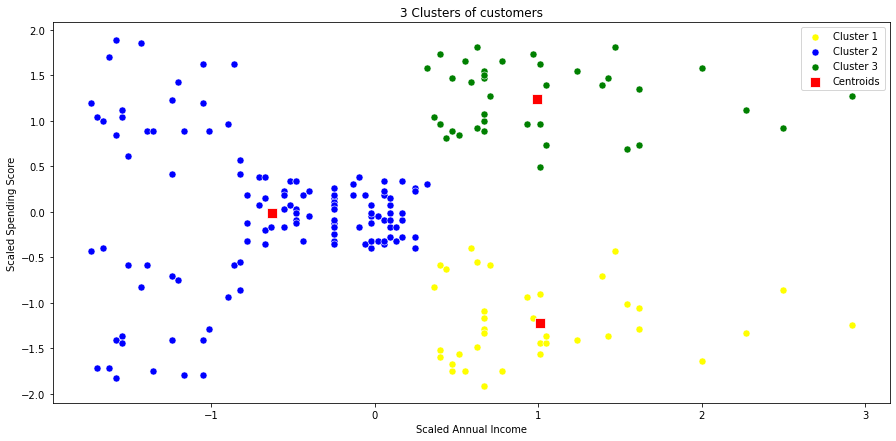

In [22]:
# Visualising the clusters of size 3
plt.figure(figsize=(15,7))
sns.scatterplot(df_scaled[pred_3 == 0, 0], df_scaled[pred_3 == 0, 1], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_3 == 1, 0], df_scaled[pred_3 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_3 == 2, 0], df_scaled[pred_3 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(centroid_3[:, 0], centroid_3[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('3 Clusters of customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

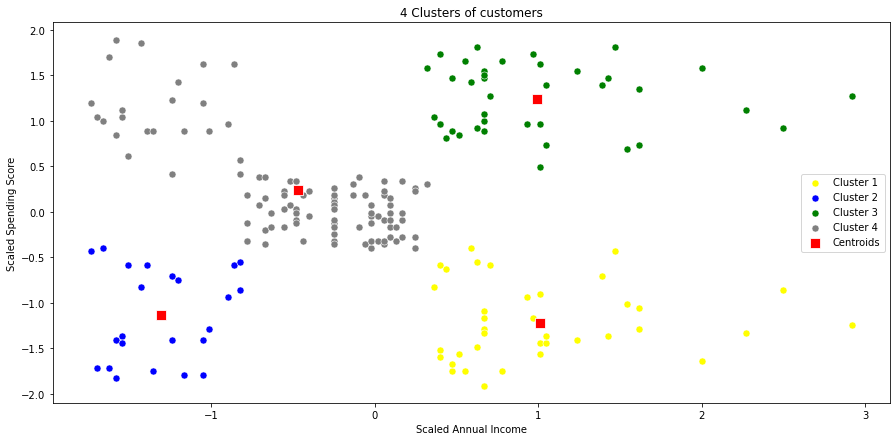

In [23]:
# Visualising the clusters of size 4
plt.figure(figsize=(15,7))
sns.scatterplot(df_scaled[pred_4 == 0, 0], df_scaled[pred_4 == 0, 1], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_4 == 1, 0], df_scaled[pred_4 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_4 == 2, 0], df_scaled[pred_4 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df_scaled[pred_4 == 3, 0], df_scaled[pred_4 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(centroid_4[:, 0], centroid_4[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('4 Clusters of customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()


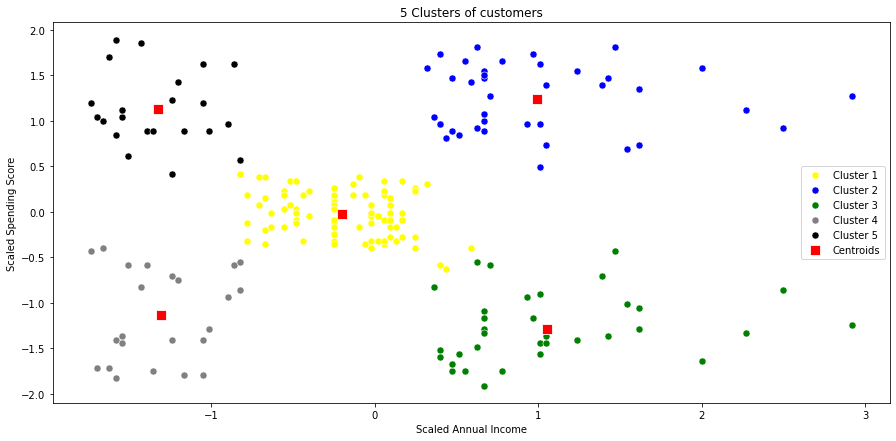

In [24]:
# Visualising the clusters of size 5
plt.figure(figsize=(15,7))
sns.scatterplot(df_scaled[pred_5 == 0, 0], df_scaled[pred_5 == 0, 1], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_5 == 1, 0], df_scaled[pred_5 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_5 == 2, 0], df_scaled[pred_5 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df_scaled[pred_5 == 3, 0], df_scaled[pred_5 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(df_scaled[pred_5 == 4, 0], df_scaled[pred_5 == 4, 1], color = 'black', label = 'Cluster 5',s=50)
sns.scatterplot(centroid_5[:, 0], centroid_5[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('5 Clusters of customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

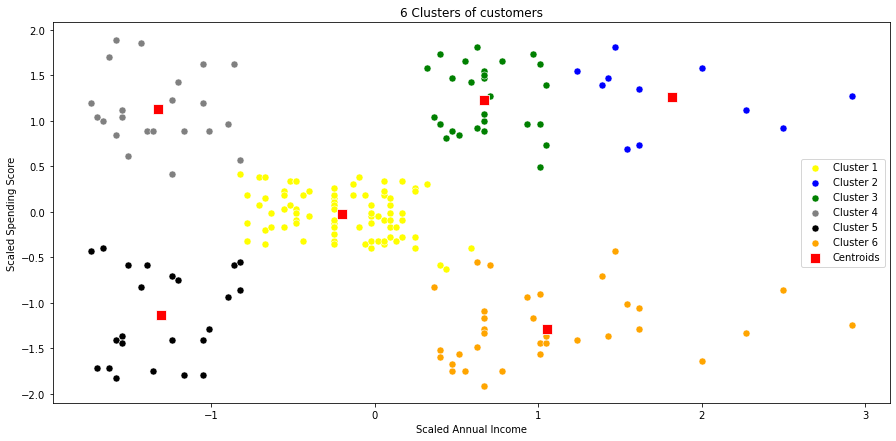

In [25]:
# Visualising the clusters of size 6
plt.figure(figsize=(15,7))
sns.scatterplot(df_scaled[pred_6 == 0, 0], df_scaled[pred_6 == 0, 1], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_6 == 1, 0], df_scaled[pred_6 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_6 == 2, 0], df_scaled[pred_6 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df_scaled[pred_6 == 3, 0], df_scaled[pred_6 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(df_scaled[pred_6 == 4, 0], df_scaled[pred_6 == 4, 1], color = 'black', label = 'Cluster 5',s=50)
sns.scatterplot(df_scaled[pred_6 == 5, 0], df_scaled[pred_6 == 5, 1], color = 'orange', label = 'Cluster 6',s=50)
sns.scatterplot(centroid_6[:, 0], centroid_6[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('6 Clusters of customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

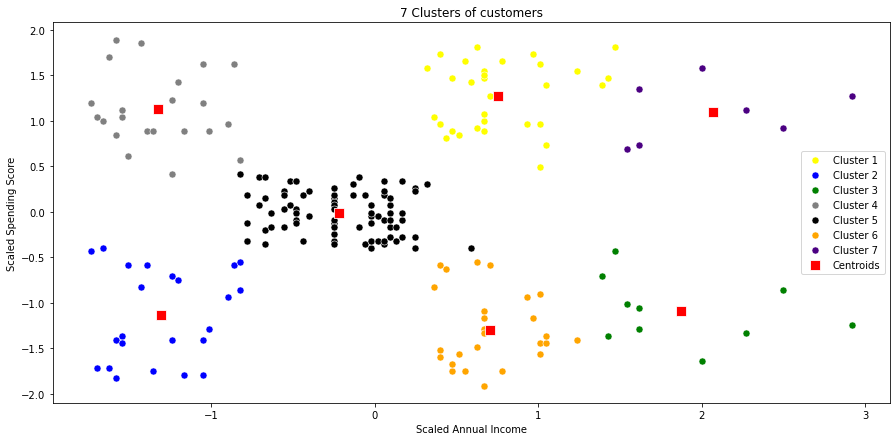

In [26]:
# Visualising the clusters of size 7
plt.figure(figsize=(15,7))
sns.scatterplot(df_scaled[pred_7 == 0, 0], df_scaled[pred_7 == 0, 1], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_7 == 1, 0], df_scaled[pred_7 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_7 == 2, 0], df_scaled[pred_7 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df_scaled[pred_7 == 3, 0], df_scaled[pred_7 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(df_scaled[pred_7 == 4, 0], df_scaled[pred_7 == 4, 1], color = 'black', label = 'Cluster 5',s=50)
sns.scatterplot(df_scaled[pred_7 == 5, 0], df_scaled[pred_7 == 5, 1], color = 'orange', label = 'Cluster 6',s=50)
sns.scatterplot(df_scaled[pred_7 == 6, 0], df_scaled[pred_7 == 6, 1], color = 'indigo', label = 'Cluster 7',s=50)
sns.scatterplot(centroid_7[:, 0], centroid_7[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('7 Clusters of customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()